# 8章 状態フィードバック制御

In [2]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [3]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [4]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [5]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

## 状態フィードバック制御

In [6]:
A = '0 1; 0 -1'
B = '0; 1'
C = '1 0 ; 0 1'
D = '0; 0'
P = ss(A, B, C, D)
print(P)

A = [[ 0.  1.]
     [ 0. -1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]



In [7]:
P.pole()

array([ 0., -1.])

### 例題8.1

In [12]:
Pole = [-3-3j, -3+3j]
F = -acker(P.A, P.B, Pole)
F

matrix([[-18.,  -5.]])

(-0.5, 1.0)

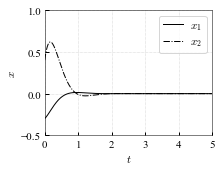

In [13]:
Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

tdata = np.arange(0, 5, 0.01)
xini, tini = initial(Pfb, tdata, [-0.3, 0.4]) #ゼロ入力応答

fig, ax = plt.subplots(figsize=(3, 2.3))

ax.plot(tini, xini[:,0], label = '$x_1$', c='k', lw=1)
ax.plot(tini, xini[:,1], ls = '-.', label = '$x_2$', c='k', lw=1)

plot_set(ax, '$t$', '$x$', 'best')
ax.set_xticks([0,1,2,3,4,5])
ax.set_ylim(-0.5,1)

#fig.savefig("sf_acker.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 例題8.2

In [17]:
A = '-1 0; 1 1'
B = '0; 1'
C = '1 0 ; 0 1'
D = '0; 0'
P = ss(A, B, C, D)
print(P)

A = [[-1.  0.]
     [ 1.  1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]



In [18]:
Vc = ctrb(P.A, P.B)
Vc

matrix([[0., 0.],
        [1., 1.]])

## 章末問題

In [6]:
#章末問題１
A = [[-3,1],[2,-2]]
B = [[2],[0]]
C = np.eye(2)
P = ss(A,B,C,0)
pole = [-4+4j,-4-4j]
F = -acker(P.A,P.B, pole)
F

matrix([[-1.5, -5.5]])

In [9]:
#章末問題２
A = [[2,1,0],[0,1,0],[1,0,1]]
B = [[0],[1],[0]]
C = np.eye(3)
P = ss(A,B,C,0)
pole = [-3, -3, -3]
F = -acker(P.A,P.B, pole)
F

matrix([[-61., -13., -64.]])

In [8]:
#章末問題３
A = [[1,0],[2,1]]
B = [[-1],[1]]
C = np.eye(2)
P = ss(A,B,C,0)
pole = [-2+1j,-2-1j]
F = -acker(P.A,P.B, pole)
F

matrix([[11.,  5.]])

In [10]:
#章末問題６
A = [[0,1],[2,-1]]
B = [[0],[1]]
C = np.eye(2)
P = ss(A,B,C,0)
pole = [-3+2j,-3-2j]
F = -acker(P.A,P.B, pole)
F

matrix([[-15.,  -5.]])

## 付録

[[-1. -1.]]


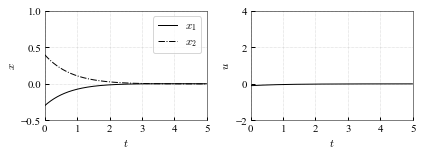

In [9]:
reg_pole = [ -1, -1 ]
F = -acker(P.A, P.B, reg_pole)
print(F)

Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

tdata = np.arange(0, 5, 0.01)
xini, tini = initial(Pfb, tdata, [-0.3, 0.4]) #ゼロ入力応答

u = [ [F[0,0]*xini[i,0]+F[0,1]*xini[i,1]] for i in range(len(xini))]

fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

ax[0].plot(tini, xini[:,0], label = '$x_1$', c='k', lw=1)
ax[0].plot(tini, xini[:,1], ls = '-.', label = '$x_2$', c='k', lw=1)

ax[1].plot(tini, u, c='k', lw=1)

plot_set(ax[0], '$t$', '$x$', 'best')
ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_ylim(-0.5,1)

plot_set(ax[1], '$t$', '$u$')
ax[1].set_xticks([0,1,2,3,4,5])
ax[1].set_ylim(-2,4)

fig.tight_layout()
#fig.savefig("sf_pole1.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

[[-25.  -7.]]


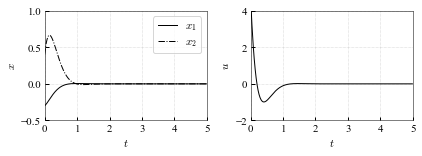

In [10]:
reg_pole = [ -4+3j, -4-3j ]
F = -acker(P.A, P.B, reg_pole)
print(F)

Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

tdata = np.arange(0, 5, 0.01)
xini, tini = initial(Pfb, tdata, [-0.3, 0.4]) #ゼロ入力応答

u = [ [F[0,0]*xini[i,0]+F[0,1]*xini[i,1]] for i in range(len(xini))]

fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

ax[0].plot(tini, xini[:,0], label = '$x_1$', c='k', lw=1)
ax[0].plot(tini, xini[:,1], ls = '-.', label = '$x_2$', c='k', lw=1)

ax[1].plot(tini, u, c='k', lw=1)

plot_set(ax[0], '$t$', '$x$', 'best')
ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_ylim(-0.5,1)

plot_set(ax[1], '$t$', '$u$')
ax[1].set_xticks([0,1,2,3,4,5])
ax[1].set_ylim(-2,4)

fig.tight_layout()
#fig.savefig("sf_pole2.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

[[-10.  -1.]]


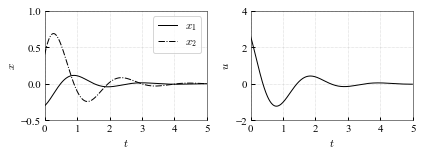

In [11]:
reg_pole = [ -1+3j, -1-3j ]
F = -acker(P.A, P.B, reg_pole)
print(F)

Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

tdata = np.arange(0, 5, 0.01)
xini, tini = initial(Pfb, tdata, [-0.3, 0.4]) #ゼロ入力応答

u = [ [F[0,0]*xini[i,0]+F[0,1]*xini[i,1]] for i in range(len(xini))]

fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

ax[0].plot(tini, xini[:,0], label = '$x_1$', c='k', lw=1)
ax[0].plot(tini, xini[:,1], ls = '-.', label = '$x_2$', c='k', lw=1)

ax[1].plot(tini, u, c='k', lw=1)

plot_set(ax[0], '$t$', '$x$', 'best')
ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_ylim(-0.5,1)

plot_set(ax[1], '$t$', '$u$')
ax[1].set_xticks([0,1,2,3,4,5])
ax[1].set_ylim(-2,4)

fig.tight_layout()
#fig.savefig("sf_pole3.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)